# L2 and L1 gradient GIFs!

We'll show how L1 regularization leads to sparsity in 2 gifs.

See [this blog post](http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/) for inspiration on animation with `matplotlib`.

For this to work, you'll need to...

- `brew install ffmpeg`
- `brew install imagemagick`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Image

%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['animation.html'] = 'html5'

x, y = pd.np.meshgrid(pd.np.arange(-1, 4.1, .1), pd.np.arange(-1, 4.1, .1))

In [2]:
def get_quadratic_neg_gradient(x_in, y_in, x_source, y_source, alpha=1):
    """Gradient of f(x, y) = ||(x-x_source, y-y_source)||**2"""
    return -2*alpha*(x_in - x_source), -2*alpha*(y_in - y_source)

def get_l1_neg_gradient(x_in, y_in, alpha=1):
    return -alpha*pd.np.sign(x_in), -alpha*pd.np.sign(y_in)

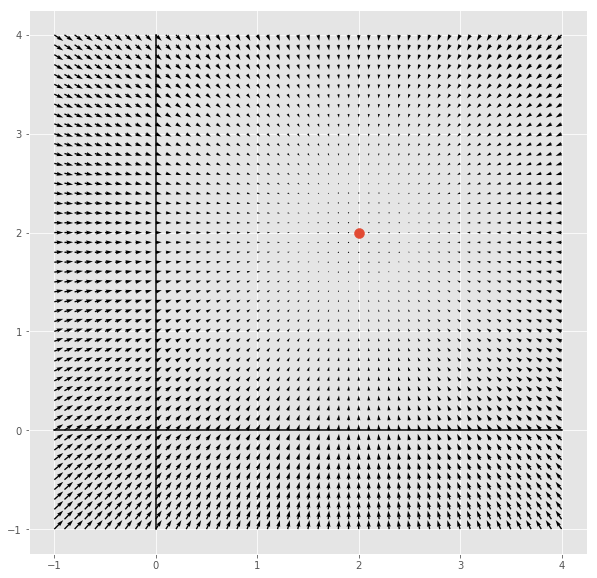

In [3]:
# Warmup
fig, ax = plt.subplots()
u_source, v_source = get_quadratic_neg_gradient(x, y, 4, 4)
u_reg, v_reg = get_quadratic_neg_gradient(x, y, 0, 0)
u = u_source + u_reg
v = v_source + v_reg
lengths = u*u + v*v
min_length_location = pd.np.unravel_index(lengths.argmin(), lengths.shape)
ax.quiver(x, y, u, v)
ax.scatter(x[min_length_location], y[min_length_location], s=100)
ax.plot([0, 0], [-1, 4], color='black')
ax.plot([-1, 4], [0, 0], color='black')

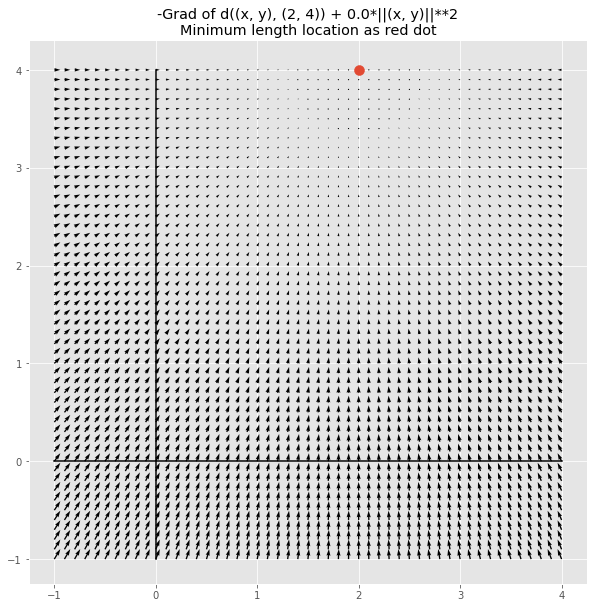

In [20]:
# Animation for L2 regularization

fig, ax = plt.subplots()

def l2_animate(frame):
    u_source, v_source = get_quadratic_neg_gradient(x, y, 2, 4)
    u_reg, v_reg = get_quadratic_neg_gradient(x, y, 0, 0, alpha=frame/2.0)
    u = u_source + u_reg
    v = v_source + v_reg
    lengths = u*u + v*v
    min_length_location = pd.np.unravel_index(lengths.argmin(), lengths.shape)
    ax.clear()
    ax.set_title("-Grad of d((x, y), (2, 4)) + {:<3}*||(x, y)||**2\nMinimum length location as red dot".format(frame/2.0))
    ax.quiver(x, y, u, v)
    ax.scatter(x[min_length_location], y[min_length_location], s=100)
    ax.plot([0, 0], [-1, 4], color='black')
    ax.plot([-1, 4], [0, 0], color='black')
    return ax

l2_animation = animation.FuncAnimation(fig, l2_animate, frames=20, interval=1000)

In [21]:
l2_animation.save('./l2_animation.gif', writer='imagemagick', fps=5)

In [22]:
Image(url='./l2_animation.gif')

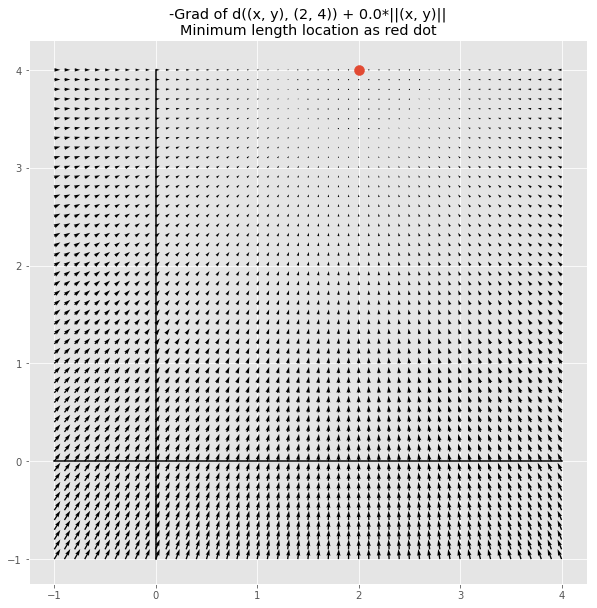

In [11]:
# Animation for L1 regularization

fig, ax = plt.subplots()

def l1_animate(frame):
    u_source, v_source = get_quadratic_neg_gradient(x, y, 2, 4)
    u_reg, v_reg = get_l1_neg_gradient(x, y, alpha=frame/2.0)
    u = u_source + u_reg
    v = v_source + v_reg
    ax.clear()
    lengths = u*u + v*v
    min_length_location = pd.np.unravel_index(lengths.argmin(), lengths.shape)
    ax.clear()
    ax.set_title("-Grad of d((x, y), (2, 4)) + {:<3}*||(x, y)||\nMinimum length location as red dot".format(frame/2.0))
    ax.quiver(x, y, u, v)
    ax.scatter(x[min_length_location], y[min_length_location], s=100)
    ax.plot([0, 0], [-1, 4], color='black')
    ax.plot([-1, 4], [0, 0], color='black')
    return ax

l1_animation = animation.FuncAnimation(fig, l1_animate, frames=20, interval=1000)

In [12]:
l1_animation.save('./l1_animation.gif', writer='imagemagick', fps=5)

In [13]:
Image(url='./l1_animation.gif')